In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import IRIS
iris_data = gpd.read_file("../data/IRIS_census_final.gpkg").to_crs(epsg=2154)

# import stations
stations_data = gpd.read_file("../data/transit_all_final.gpkg").to_crs(epsg=2154)

In [3]:
iris_data["walk_time_min"]

0       15.094624
1       10.659588
2       15.605951
3       11.674702
4       20.592260
          ...    
5408     1.292440
5409     0.744894
5410     2.722114
5411     4.144363
5412    11.491441
Name: walk_time_min, Length: 5413, dtype: float64

### Spatial Aggregations for Choropleths

In [4]:
columns_tosum = ['population', 'station_count']
columns_tomean = [ 'dist_to_station_m',
 'walk_time_min',
 'time_min', 'median_net_income',
 'median_disposable_income',
 'unemployment_rate',
 'employed_rate',
 'studying_rate',
 'retired_rate',
 'work_local',
 'work_diffcommune_samearr',
 'work_diffcommune_samedept',
 'work_diffcommune_diffdept_sameregion',
 'work_diffregion',
 'work_diffcountry_',
 'commute_notransport',
 'commute_walk',
 'commute_bicycle',
 'commute_motorcycle',
 'commute_vehicle',
 'commute_publictransport']

In [5]:
# define aggregation dictionary
agg_dict = {col: "sum" for col in columns_tosum}
agg_dict.update({col: "mean" for col in columns_tomean})

In [6]:
# reusable aggregation loop
levels = ["INSEE_COM_ID", "INSEE_ARR_ID", "INSEE_DEP_ID"]
aggregated_gdfs = {}

for level in levels:
    aggregated_gdfs[level] = (iris_data.dissolve(by=level, aggfunc=agg_dict).reset_index())

In [7]:
# save dataframe for each admin level
commune_gdf = aggregated_gdfs["INSEE_COM_ID"]
arrondissement_gdf = aggregated_gdfs["INSEE_ARR_ID"]
department_gdf = aggregated_gdfs["INSEE_DEP_ID"]

In [8]:
# upload geometry for future choropleths
geo_communes = gpd.read_file("../data/boundaries/individual_layers/Communes_iledefrance_with_parisarrs.geojson")
geo_arrondissements = gpd.read_file("../data/boundaries/individual_layers/Arrondissements_iledefrance.geojson")
geo_departments = gpd.read_file("../data/boundaries/individual_layers/Departements_iledefrance.geojson")

### Select transit deserts

In [9]:
iris_data[["walk_time_min", "time_min"]].describe()

,walk_time_min,time_min
count,5413.000000,5413.000000
mean,3.293331,63.325697
std,4.384814,51.862090
min,0.050957,1.000000
25%,1.234407,29.000000
50%,1.904243,45.000000
75%,3.265039,71.000000
max,46.268226,181.000000


In [10]:
# Find worst 10% travel time or walk time
walk_threshold = iris_data["walk_time_min"].quantile(0.75)
travel_threshold = iris_data["time_min"].quantile(0.75)

transit_time_deserts = iris_data[(iris_data["time_min"] >= travel_threshold)]
transit_accessibility_deserts = iris_data[(iris_data["walk_time_min"] >= walk_threshold)]
transit_deserts = iris_data[(iris_data["walk_time_min"] > walk_threshold) & (iris_data["time_min"] > travel_threshold)]

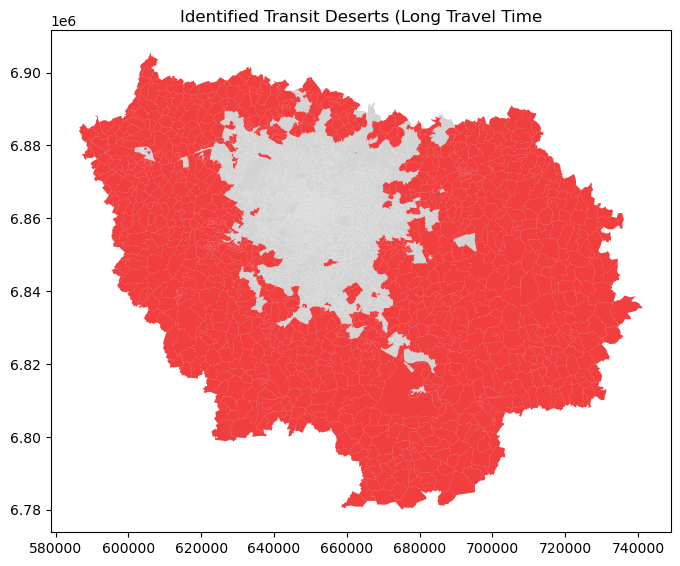

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iris_data.plot(ax=ax, color="lightgray", linewidth=0)
transit_time_deserts.plot(ax=ax, color="red", alpha=0.7)
plt.title("Identified Transit Deserts (Long Travel Time")
plt.show()

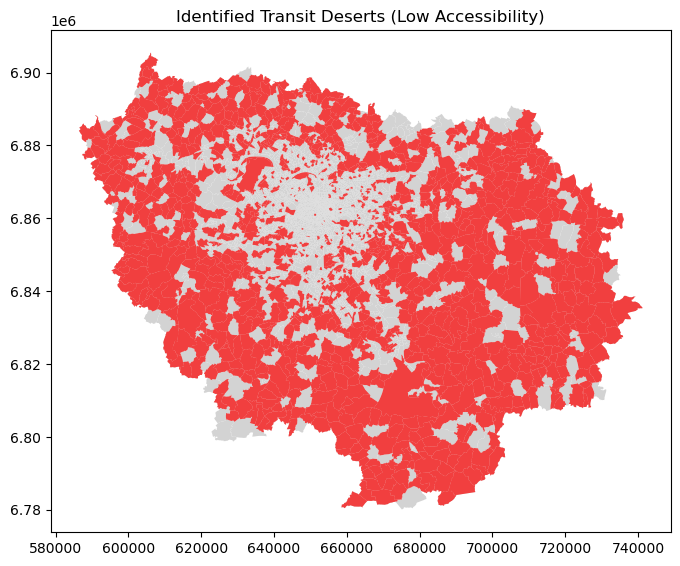

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iris_data.plot(ax=ax, color="lightgray", linewidth=0)
transit_accessibility_deserts.plot(ax=ax, color="red", alpha=0.7)
plt.title("Identified Transit Deserts (Low Accessibility)")
plt.show()

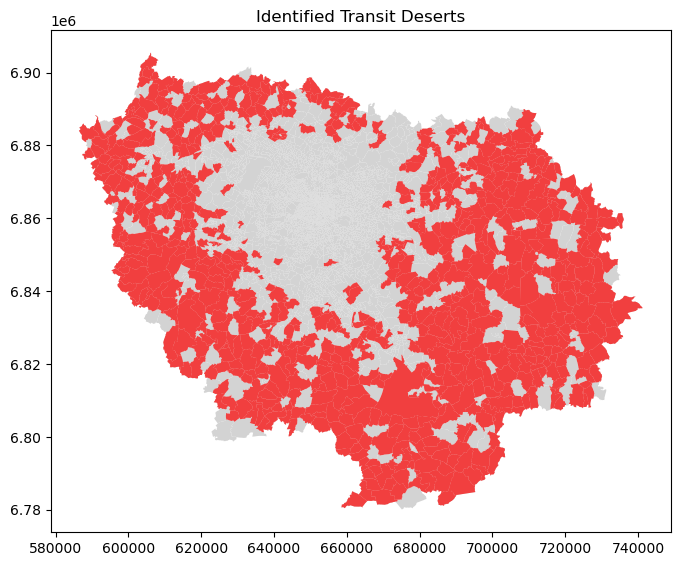

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iris_data.plot(ax=ax, color="lightgray", linewidth=0)
transit_deserts.plot(ax=ax, color="red", alpha=0.7)
plt.title("Identified Transit Deserts")
plt.show()

### Choropleths

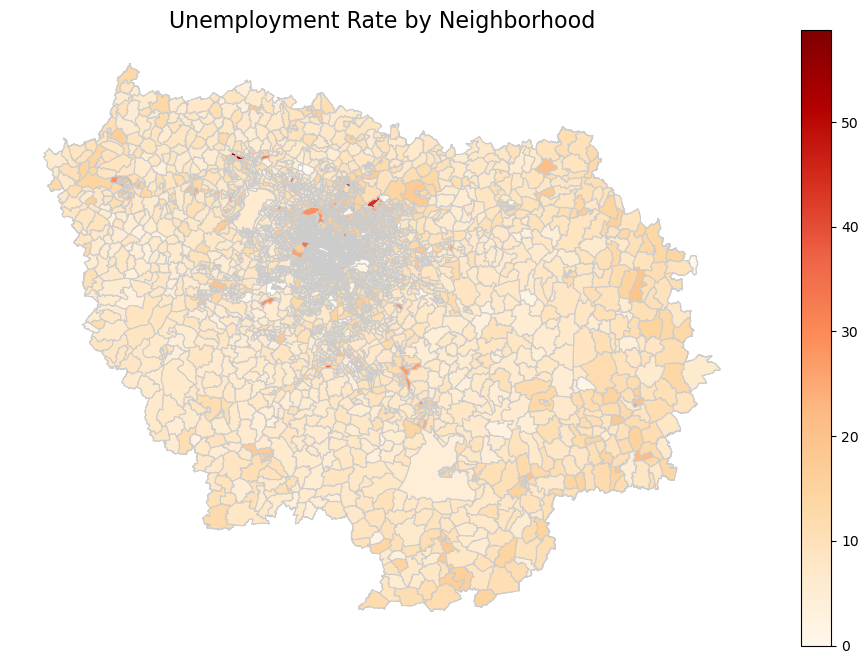

In [14]:
# unemploymenmt
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

iris_data.plot(
    column="unemployment_rate",          # The variable you want to visualize
    cmap="OrRd",               # Color scheme ("OrRd", "Blues", "Viridis", etc.)
    legend=True,               # Add legend
    linewidth=0.8,
    edgecolor="0.8",
    ax=ax
)

ax.set_title("Unemployment Rate by Neighborhood", fontsize=16)
ax.axis("off")
plt.show()


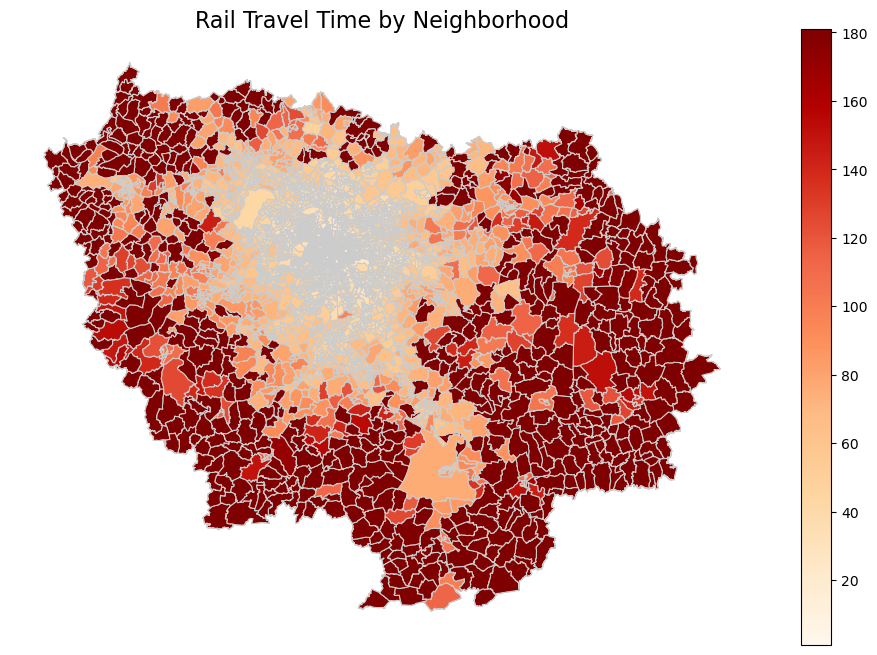

In [15]:
# rail travel time
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

iris_data.plot(
    column="time_min",          # The variable you want to visualize
    cmap="OrRd",               # Color scheme ("OrRd", "Blues", "Viridis", etc.)
    legend=True,               # Add legend
    linewidth=0.8,
    edgecolor="0.8",
    ax=ax
)

ax.set_title("Rail Travel Time by Neighborhood", fontsize=16)
ax.axis("off")
plt.show()


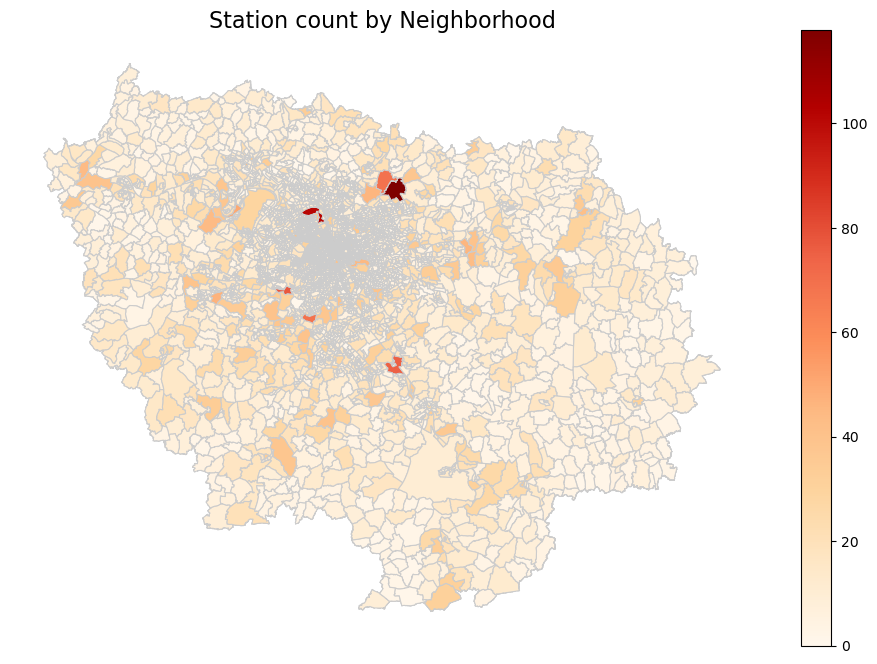

In [16]:
# rail station count
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

iris_data.plot(
    column="station_count",          # The variable you want to visualize
    cmap="OrRd",               # Color scheme ("OrRd", "Blues", "Viridis", etc.)
    legend=True,               # Add legend
    linewidth=0.8,
    edgecolor="0.8",
    ax=ax
)

ax.set_title("Station count by Neighborhood", fontsize=16)
ax.axis("off")
plt.show()

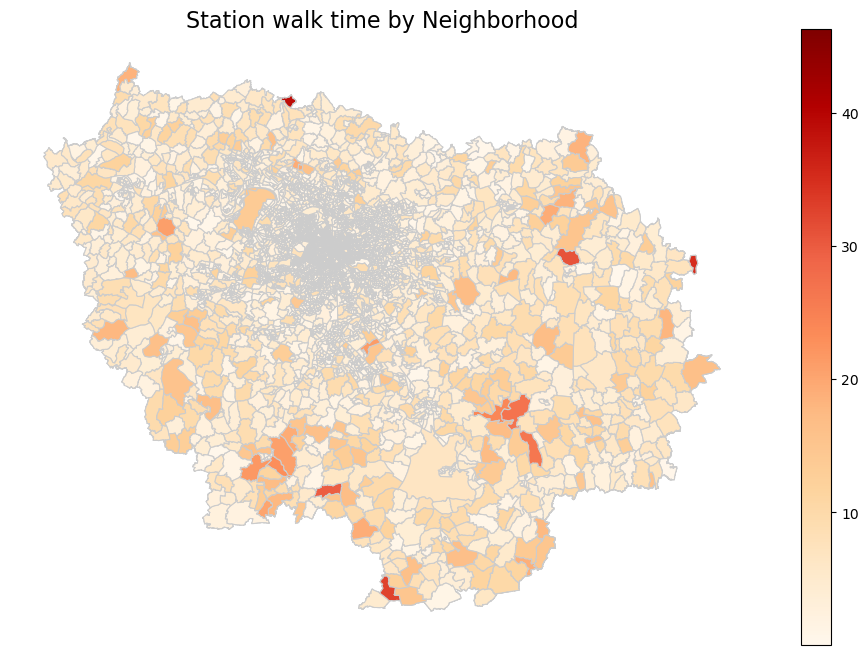

In [17]:
# station walk time
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

iris_data.plot(
    column="walk_time_min",          # The variable you want to visualize
    cmap="OrRd",               # Color scheme ("OrRd", "Blues", "Viridis", etc.)
    legend=True,               # Add legend
    linewidth=0.8,
    edgecolor="0.8",
    ax=ax
)

ax.set_title("Station walk time by Neighborhood", fontsize=16)
ax.axis("off")
plt.show()

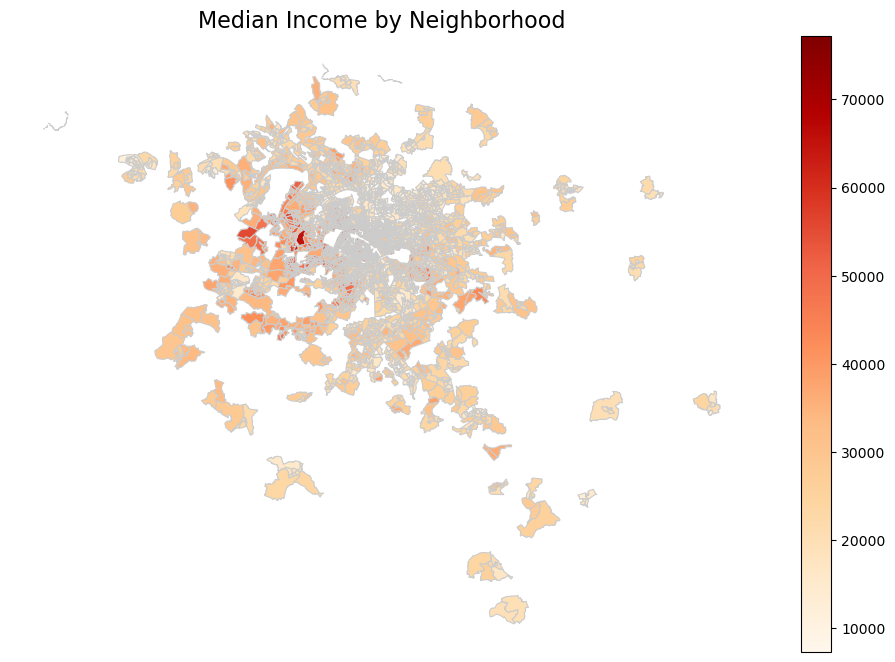

In [18]:
# income
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

iris_data.plot(
    column="median_net_income",          # The variable you want to visualize
    cmap="OrRd",               # Color scheme ("OrRd", "Blues", "Viridis", etc.)
    legend=True,               # Add legend
    linewidth=0.8,
    edgecolor="0.8",
    ax=ax
)

ax.set_title("Median Income by Neighborhood", fontsize=16)
ax.axis("off")
plt.show()


### Plot time vs money

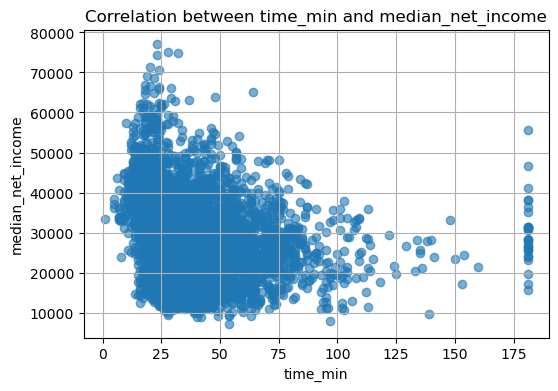

In [19]:
x_col = "time_min"
y_col = "median_net_income"

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(iris_data[x_col], iris_data[y_col], alpha=0.6)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Correlation between {x_col} and {y_col}")
plt.grid(True)
plt.show()

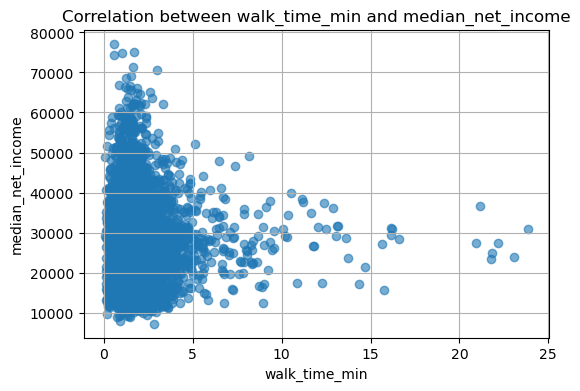

In [20]:
x_col = "walk_time_min"
y_col = "median_net_income"

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(iris_data[x_col], iris_data[y_col], alpha=0.6)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Correlation between {x_col} and {y_col}")
plt.grid(True)
plt.show()

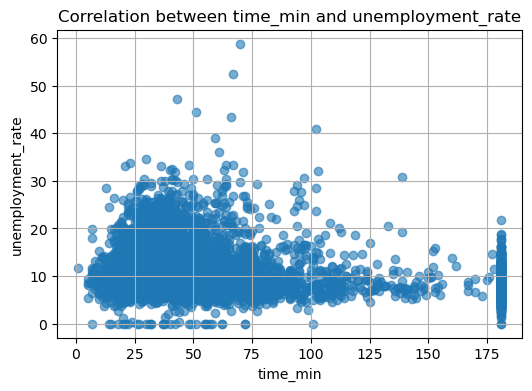

In [21]:
x_col = "time_min"
y_col = "unemployment_rate"

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(iris_data[x_col], iris_data[y_col], alpha=0.6)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Correlation between {x_col} and {y_col}")
plt.grid(True)
plt.show()

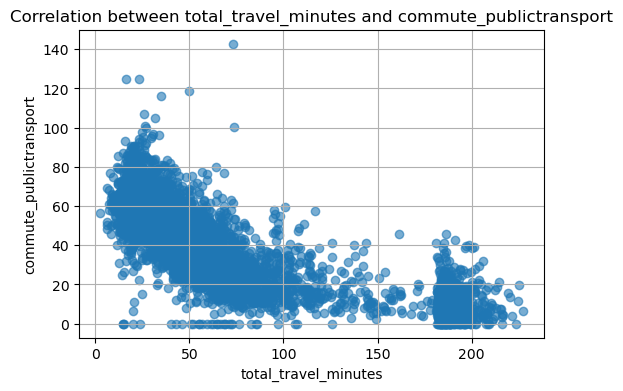

In [30]:
x_col = "total_travel_minutes"
y_col = "commute_publictransport"

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(iris_data[x_col], iris_data[y_col], alpha=0.6)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Correlation between {x_col} and {y_col}")
plt.grid(True)
plt.show()

### Neighboring transit deserts

In [562]:
# make a copy to be safe
iris = iris_data.copy()

# Replace 0 or NaN populations with NaN to avoid inf
iris['stationspercapita'] = np.where(iris['population'] > 0, iris['station_count'] / iris['population'], np.nan)
iris['peopleperstation'] = np.where(iris['station_count'] > 0, iris['population'] / iris['station_count'], np.nan)



iris['is_transit_desert'] = (
    (iris['time_min'] > 30) &
    (iris['work_diffcommune_diffdept_sameregion'] > 33) &
    (iris['commute_publictransport'] > 33)
)
'''
### best parameters for unemployment: over 1km away, over 60 minutes travel time
# create boolean column
iris['is_transit_desert'] = (
    (iris['dist_to_station_m'] > 1000) &
    (iris['time_min'] > 60)
)
'''

"\n### best parameters for unemployment: over 1km away, over 60 minutes travel time\n# create boolean column\niris['is_transit_desert'] = (\n    (iris['dist_to_station_m'] > 1000) &\n    (iris['time_min'] > 60)\n)\n"

In [563]:
StDenis = iris.loc[iris['INSEE_DEP_ID'] == "93"]
mean_value = StDenis['work_diffcommune_diffdept_sameregion'].mean()
print(mean_value)

54.981710657383445


In [564]:
iris['INSEE_DEP_ID'].unique()

array(['02', '10', '27', '28', '45', '51', '60', '75', '77', '78', '89',
       '91', '92', '93', '94', '95'], dtype=object)

In [565]:
iris['is_transit_desert'].value_counts()

is_transit_desert
False    3555
True     1858
Name: count, dtype: int64

In [566]:
# Subset to transit deserts
deserts = iris[iris['is_transit_desert']]

# Spatial join: find polygons that touch each other
neighbors = gpd.sjoin(deserts, deserts, how='inner', predicate='touches')

# Detect which column names exist
possible_left = [c for c in ['index_left', 'left_index'] if c in neighbors.columns]
possible_right = [c for c in ['index_right', 'right_index'] if c in neighbors.columns]

# If none of the above exist, it’s the old convention where the index is preserved
if not possible_left or not possible_right:
    # old versions keep the left geometry index as the DataFrame index
    neighbors = neighbors.reset_index()
    left_col = 'index'
    right_col = 'index_right' if 'index_right' in neighbors.columns else 'index_2'
else:
    left_col = possible_left[0]
    right_col = possible_right[0]

# Remove self-joins (same polygon joined to itself)
neighbors = neighbors[neighbors[left_col] != neighbors[right_col]]

# Group neighbors into a dictionary
neighbor_dict = (
    neighbors.groupby(left_col)[right_col]
    .apply(list)
    .to_dict()
)

# Flag polygons that have other desert neighbors (clusters)
iris['desert_cluster'] = iris.index.map(
    lambda i: i in neighbor_dict and len(neighbor_dict[i]) > 0
)

In [567]:
print(neighbors.columns)
print(list(neighbor_dict.items())[:5])


Index(['index', 'INSEE_IRIS_ID_left', 'OBJECTID_left', 'TYP_IRIS_left',
       'IRIS_left', 'NOM_IRIS_left', 'INSEE_COM_ID_left', 'NOM_COM_left',
       'INSEE_ARR_ID_left', 'NOM_ARR_left', 'INSEE_DEP_ID_left',
       'NOM_DEP_left', 'INSEE_REG_left', 'arrid_left',
       'dist_to_station_m_left', 'walk_time_min_left', 'station_count_left',
       'time_min_left', 'population_left', 'median_net_income_left',
       'median_disposable_income_left', 'unemployment_rate_left',
       'employed_rate_left', 'studying_rate_left', 'retired_rate_left',
       'work_local_left', 'work_diffcommune_samearr_left',
       'work_diffcommune_samedept_left',
       'work_diffcommune_diffdept_sameregion_left', 'work_diffregion_left',
       'work_diffcountry__left', 'commute_notransport_left',
       'commute_walk_left', 'commute_bicycle_left', 'commute_motorcycle_left',
       'commute_vehicle_left', 'commute_publictransport_left',
       'total_travel_minutes_left', 'geometry', 'stationspercapita_left

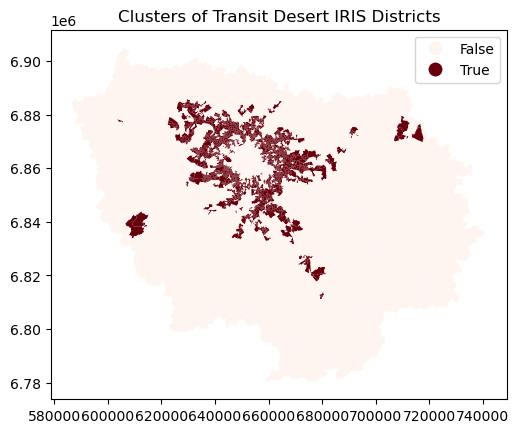

In [568]:
import matplotlib.pyplot as plt

iris.plot(column='desert_cluster', cmap='Reds', legend=True)
plt.title("Clusters of Transit Desert IRIS Districts")
plt.show()


In [569]:
bool_desert_clusters = iris.copy()

In [570]:
true_desert_clusters = iris[iris['desert_cluster']]
false_desert_clusters = iris[~iris['desert_cluster']]

In [571]:
print(true_desert_clusters.columns)

Index(['INSEE_IRIS_ID', 'OBJECTID', 'TYP_IRIS', 'IRIS', 'NOM_IRIS',
       'INSEE_COM_ID', 'NOM_COM', 'INSEE_ARR_ID', 'NOM_ARR', 'INSEE_DEP_ID',
       'NOM_DEP', 'INSEE_REG', 'arrid', 'dist_to_station_m', 'walk_time_min',
       'station_count', 'time_min', 'population', 'median_net_income',
       'median_disposable_income', 'unemployment_rate', 'employed_rate',
       'studying_rate', 'retired_rate', 'work_local',
       'work_diffcommune_samearr', 'work_diffcommune_samedept',
       'work_diffcommune_diffdept_sameregion', 'work_diffregion',
       'work_diffcountry_', 'commute_notransport', 'commute_walk',
       'commute_bicycle', 'commute_motorcycle', 'commute_vehicle',
       'commute_publictransport', 'total_travel_minutes', 'geometry',
       'stationspercapita', 'peopleperstation', 'is_transit_desert',
       'desert_cluster'],
      dtype='object')


In [572]:
print(true_desert_clusters['median_net_income'].median())
print(false_desert_clusters['median_net_income'].median())

23040.0
28650.0


In [573]:
print(true_desert_clusters['unemployment_rate'].median())
print(false_desert_clusters['unemployment_rate'].median())

11.93117632144714
9.269411692564686


In [574]:
print(true_desert_clusters['commute_vehicle'].median())
print(false_desert_clusters['commute_vehicle'].median())
print(true_desert_clusters['commute_publictransport'].median())
print(false_desert_clusters['commute_publictransport'].median())

40.19605912406634
54.08802735766089
46.89930819856764
30.92635268168756


In [575]:
print(true_desert_clusters['work_diffcommune_diffdept_sameregion'].median())
print(false_desert_clusters['work_diffcommune_diffdept_sameregion'].median())

52.57088634144465
32.79146282649016


In [576]:
print(true_desert_clusters['work_diffcommune_samedept'].median())
print(false_desert_clusters['work_diffcommune_samedept'].median())

27.46896830693936
30.20280317202796


In [577]:
print(true_desert_clusters['dist_to_station_m'].median())
print(false_desert_clusters['dist_to_station_m'].median())

148.6079026018604
168.1582638944265
